In [18]:
"""
EXPLANATION OF COLUMNS

01) weather_code → short code representing weather condition (e.g., sunny, rainy, cloudy).
02) temperature_2m_max → maximum air temperature at 2 meters above ground during the day.
03) temperature_2m_min → minimum air temperature at 2 meters above ground during the day.
04) temperature_2m_mean → average air temperature at 2 meters above ground during the day.
05) apparent_temperature_max → maximum “feels like” temperature (accounts for humidity and wind) at 2m.
06) apparent_temperature_min → minimum “feels like” temperature at 2m.
07) apparent_temperature_mean → average “feels like” temperature at 2m.
08) daylight_duration → total duration of daylight in seconds (time between sunrise and sunset).
09) sunshine_duration → total duration of actual sunshine in seconds (time with direct sunlight).
10) precipitation_sum → total precipitation (rain + snow + hail) in mm over the day.
11) rain_sum → total rainfall in mm over the day.
12) precipitation_hours → total hours during which precipitation occurred.
13) wind_speed_10m_max → maximum sustained wind speed at 10 meters above ground.
14) wind_gusts_10m_max → maximum wind gusts at 10 meters above ground.
15) wind_direction_10m_dominant → dominant wind direction at 10 meters during the day (in degrees).
16) shortwave_radiation_sum → total solar radiation received at the surface during the day (in Joules per square meter).
17) et0_fao_evapotranspiration → reference evapotranspiration (water loss from soil + plants) calculated using FAO method (mm/day).
"""

'\nEXPLANATION OF COLUMNS\n\n01) weather_code → short code representing weather condition (e.g., sunny, rainy, cloudy).\n02) temperature_2m_max → maximum air temperature at 2 meters above ground during the day.\n03) temperature_2m_min → minimum air temperature at 2 meters above ground during the day.\n04) temperature_2m_mean → average air temperature at 2 meters above ground during the day.\n05) apparent_temperature_max → maximum “feels like” temperature (accounts for humidity and wind) at 2m.\n06) apparent_temperature_min → minimum “feels like” temperature at 2m.\n07) apparent_temperature_mean → average “feels like” temperature at 2m.\n08) daylight_duration → total duration of daylight in seconds (time between sunrise and sunset).\n09) sunshine_duration → total duration of actual sunshine in seconds (time with direct sunlight).\n10) precipitation_sum → total precipitation (rain + snow + hail) in mm over the day.\n11) rain_sum → total rainfall in mm over the day.\n12) precipitation_hou

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# Load the two datasets
location_df = pd.read_csv('./Datasets/location_data.csv')
weather_df = pd.read_csv('./Datasets/weather_data.csv')

# Take only the location_id and city_name from location dataset
new_location_df = location_df[['location_id', 'city_name']].copy()

# Merge the two datasets
merged_df = weather_df.merge(new_location_df, on='location_id', how='left')

In [21]:
merged_df.head()

,location_id,date,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),daylight_duration (s),...,rain_sum (mm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),wind_direction_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm),sunrise,sunset,city_name
0,0,1/1/2010,1,30.1,22.6,26.0,34.5,25.0,29.0,42220.20,...,0.0,0,12.2,27.4,19,20.92,4.61,06:22,18:05,Colombo
1,0,1/2/2010,51,30.1,23.7,26.3,33.9,26.1,29.7,42225.71,...,0.1,1,13.0,27.0,24,17.71,3.91,06:22,18:06,Colombo
2,0,1/3/2010,51,29.6,23.1,26.0,34.5,26.2,29.9,42231.68,...,0.6,3,12.3,27.4,17,17.76,3.66,06:22,18:06,Colombo
3,0,1/4/2010,2,28.9,23.1,25.7,31.7,26.1,28.4,42238.11,...,0.0,0,17.0,34.6,357,16.50,3.75,06:23,18:07,Colombo
4,0,1/5/2010,1,28.1,21.3,24.6,30.0,22.9,26.2,42244.99,...,0.0,0,18.7,37.1,353,23.61,5.00,06:23,18:07,Colombo


# Data Cleaning

Header Cleaning

In [22]:

# Remove everything after the first space of every column name
# Before: weather_code (wmo code)  ->  After: weather_code
for col in merged_df.columns:
    merged_df.rename(columns={col: col.split(' ')[0]}, inplace=True)

merged_df.head(1)

,location_id,date,weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,daylight_duration,...,rain_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,sunrise,sunset,city_name
0,0,1/1/2010,1,30.1,22.6,26.0,34.5,25.0,29.0,42220.2,...,0.0,0,12.2,27.4,19,20.92,4.61,06:22,18:05,Colombo


Data Cleaning

In [23]:
# ======================= Fixing data types ======================= #

# Converting date column to a datetime object
merged_df['date'] = pd.to_datetime(merged_df['date'], errors='coerce')

# Converting sunrise & sunset columns to a time object
merged_df['sunrise'] = pd.to_datetime(merged_df['sunrise'], format='%H:%M', errors='coerce')
merged_df['sunset'] = pd.to_datetime(merged_df['sunset'], format='%H:%M', errors='coerce')

print('Date data type: ', merged_df.date.dtype)
print('Sunrise data type: ', merged_df.sunrise.dtype)
print('Sunset data type: ', merged_df.sunset.dtype)

merged_df.head()

Date data type:  datetime64[ns]
Sunrise data type:  datetime64[ns]
Sunset data type:  datetime64[ns]


,location_id,date,weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,daylight_duration,...,rain_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,sunrise,sunset,city_name
0,0,2010-01-01,1,30.1,22.6,26.0,34.5,25.0,29.0,42220.20,...,0.0,0,12.2,27.4,19,20.92,4.61,1900-01-01 06:22:00,1900-01-01 18:05:00,Colombo
1,0,2010-01-02,51,30.1,23.7,26.3,33.9,26.1,29.7,42225.71,...,0.1,1,13.0,27.0,24,17.71,3.91,1900-01-01 06:22:00,1900-01-01 18:06:00,Colombo
2,0,2010-01-03,51,29.6,23.1,26.0,34.5,26.2,29.9,42231.68,...,0.6,3,12.3,27.4,17,17.76,3.66,1900-01-01 06:22:00,1900-01-01 18:06:00,Colombo
3,0,2010-01-04,2,28.9,23.1,25.7,31.7,26.1,28.4,42238.11,...,0.0,0,17.0,34.6,357,16.50,3.75,1900-01-01 06:23:00,1900-01-01 18:07:00,Colombo
4,0,2010-01-05,1,28.1,21.3,24.6,30.0,22.9,26.2,42244.99,...,0.0,0,18.7,37.1,353,23.61,5.00,1900-01-01 06:23:00,1900-01-01 18:07:00,Colombo


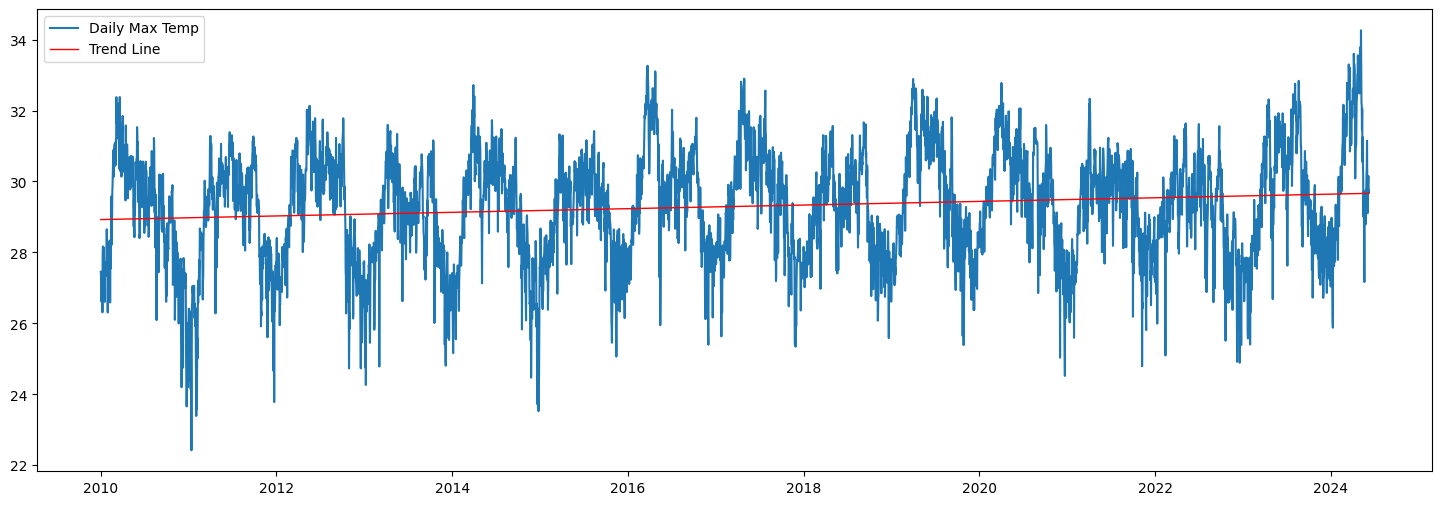

In [24]:
avg_daily_max_temp = merged_df.groupby('date')['temperature_2m_max'].mean()

# cordinates
x = avg_daily_max_temp.index.map(pd.Timestamp.toordinal)
y = avg_daily_max_temp.values
trend = np.poly1d(np.polyfit(x, y, 1))

# plot graph
plt.figure(figsize=(18,6))
plt.plot(avg_daily_max_temp.index, y, label='Daily Max Temp')
plt.plot(
    avg_daily_max_temp.index,
    trend(x),
    color='red',
    linewidth=1,
    label='Trend Line'
)
plt.legend()

# Preparing Data For Training

Create a Target Column

In [25]:
# Today's target/prediction = Tomorrow's temperature_2m_max
merged_df['target'] = merged_df.shift(-1)['temperature_2m_max']
print('Last target value: ', merged_df[-1:].target)

# Fill the last NaN value of the target with its previous day temperature
# Because: Tomorrow's temperature is most likely the same as today's temperature
merged_df['target'] = merged_df['target'].ffill()
print('(New) Last target value: ', merged_df[-1:].target)

Last target value:  142370   NaN
Name: target, dtype: float64
(New) Last target value:  142370    24.7
Name: target, dtype: float64


Train, Validation, and Test Sets

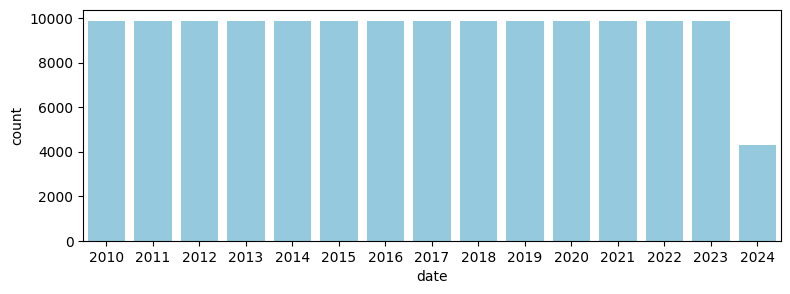

In [26]:
year = merged_df['date'].dt.year

plt.figure(figsize=(9,3))
sns.countplot(x=year, color='skyblue')
plt.show()

In [27]:
# Split the dataset based on year
train_df = merged_df[year < 2020].copy()
val_df = merged_df[(year >= 2020) & (year <= 2021)].copy()
test_df = merged_df[year >= 2022 ].copy()

print('Train size: {}%'.format(round(len(train_df)/len(merged_df)*100)))
print('Validation size: {}%'.format(round(len(val_df)/len(merged_df)*100)))
print('Test size: {}%'.format(round(len(test_df)/len(merged_df)*100)))

Train size: 69%
Validation size: 14%
Test size: 17%


Identify Input & Target Columns

In [28]:
# Main Input & Target columns
input_cols = [c for c in merged_df.columns if c != 'target']
target_col = 'target'

# Input & Target values of Train, Validation, and Test sets
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]

val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

test_inputs = test_df[input_cols]
test_targets = test_df[target_col]

Identify Numeric & Categorical Columns

In [29]:
numeric_cols = merged_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = merged_df.select_dtypes('object').columns.tolist()

print('Numerical Cols: ', numeric_cols)
print('Categorical Cols: ', categorical_cols)

Numerical Cols:  ['location_id', 'weather_code', 'temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean', 'apparent_temperature_max', 'apparent_temperature_min', 'apparent_temperature_mean', 'daylight_duration', 'sunshine_duration', 'precipitation_sum', 'rain_sum', 'precipitation_hours', 'wind_speed_10m_max', 'wind_gusts_10m_max', 'wind_direction_10m_dominant', 'shortwave_radiation_sum', 'et0_fao_evapotranspiration', 'target']
Categorical Cols:  ['city_name']


Imputing, Scaling, and Encoding

In [30]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [31]:
# ============== Imputing missing values ============== #
#imputer = SimpleImputer(strategy='mean').fit(merged_df[numeric_cols])

#train_df[numeric_cols] = imputer.transform(train_df[numeric_cols])
#val_df[numeric_cols] = imputer.transform(val_df[numeric_cols])
#test_df[numeric_cols] = imputer.transform(test_df[numeric_cols])

list(merged_df.isna().sum()) # In our dataset, there are no any missing values. So we do not need to perform imputation

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
# ============== Scaling numeric columns ============== #

# Scaling: converting numeric values to a comman range (0:1 or 1:-1)

scaler = MinMaxScaler().fit(merged_df[numeric_cols])

train_df[numeric_cols] = scaler.transform(train_df[numeric_cols])
val_df[numeric_cols] = scaler.transform(val_df[numeric_cols])
test_df[numeric_cols] = scaler.transform(test_df[numeric_cols])

train_df[numeric_cols].head(1)

,location_id,weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,daylight_duration,sunshine_duration,precipitation_sum,rain_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,target
0,0.0,8.618530e-10,-0.559521,-0.220831,-0.61734,-0.32258,-0.061349,-0.349263,-10.237873,2.896271e-19,0.0,0.0,0.0,-0.04007,-0.083112,3.142253e-12,-0.041055,-0.053612,-0.559521


In [51]:
# ============ Encoding categorical columns ============ #
def encode_data(dataset, encoder):
    encoded_cols = encoder.fit_transform(dataset[categorical_cols])
    encoded_df = pd.DataFrame(
        encoded_cols,
        columns=encoder.get_feature_names_out(categorical_cols),
        index=dataset.index
    )
    processed_cols = pd.concat([dataset.drop(columns=categorical_cols), encoded_df], axis=1)
    return processed_cols

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train = encode_data(train_inputs, encoder)
X_val = encode_data(val_inputs, encoder)
X_test = encode_data(test_inputs, encoder)

print("Before encoding: ", categorical_cols)
print("After encoding: ", list(X_train.columns[-27:]))

Before encoding:  ['city_name']
After encoding:  ['city_name_Ampara', 'city_name_Anuradhapura', 'city_name_Badulla', 'city_name_Bandarawela', 'city_name_Batticaloa', 'city_name_Colombo', 'city_name_Galle', 'city_name_Gampaha', 'city_name_Hambantota', 'city_name_Jaffna', 'city_name_Kalutara', 'city_name_Kandy', 'city_name_Kegalle', 'city_name_Kilinochchi[1]', 'city_name_Kurunegala', 'city_name_Mannar', 'city_name_Matale', 'city_name_Matara', 'city_name_Moneragala', 'city_name_Mullaitivu', 'city_name_Nuwara Eliya', 'city_name_Polonnaruwa', 'city_name_Puttalam', 'city_name_Ratnapura', 'city_name_Trincomalee', 'city_name_Vavuniya', 'city_name_Welimada']
